In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [13]:
start_date = '2023-01-01'
end_date = '2023-02-11'
df = yf.download(['AAPL', 'MSFT'], start=start_date, end=end_date)
df.head()

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2023-01-03  123.632530  235.240021  129.395518  241.298250  122.742873   
2023-01-04  124.907707  224.949860  127.181276  228.651555  123.642420   
2023-01-05  123.583099  218.282852  126.301493  223.427935  123.326093   
2023-01-06  128.130234  220.855377  128.792531  221.670344  123.454601   
2023-01-09  128.654144  223.005737  131.876686  227.051114  128.397138   

Price                         Open                 Volume            
Ticker            MSFT        AAPL        MSFT       AAPL      MSFT  
Date                                                                 
2023-01-03  233.099504  128.782649  238.676618  112117500  25740000  
2023-01-04  221.866741  125.431615  228.072247   89113600  50623400  
2023-01-05  217.742812  125.668849  223.084269   80962700  39585600  
2023-01-06  215.376472  124.561732  218.960346   87754700  43613600  
2023-01-09  222.308607  128.970474  222.347876   70790800  27369800

In [14]:
df = df['Close']
df.head()

Ticker,AAPL,MSFT
Date,,
2023-01-03,123.632530,235.240021
2023-01-04,124.907707,224.949860
2023-01-05,123.583099,218.282852
2023-01-06,128.130234,220.855377
2023-01-09,128.654144,223.005737


<Axes: xlabel='Date'>

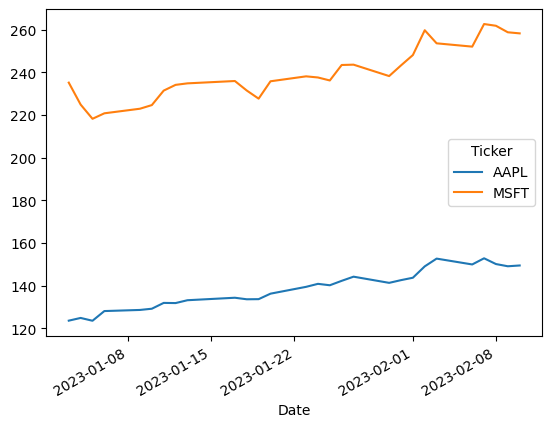

In [15]:
df.plot.line()

<Axes: xlabel='Date'>

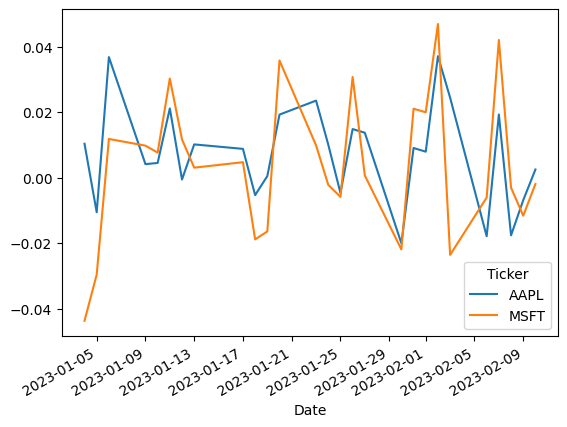

In [16]:
returns_df = df.pct_change()
returns_df.plot.line()

In [17]:
# constructing the wealth curve
initial_wealth = 1000
wealth_index_df = initial_wealth * (1 + returns_df).cumprod()
wealth_index_df.head()

Ticker,AAPL,MSFT
Date,,
2023-01-03,NaN,NaN
2023-01-04,1010.314251,956.256758
2023-01-05,999.600179,927.915460
2023-01-06,1036.379613,938.851206
2023-01-09,1040.617256,947.992338


In [18]:
wealth_index_df.loc['2023-01-03'] = initial_wealth
wealth_index_df.head()

Ticker,AAPL,MSFT
Date,,
2023-01-03,1000.000000,1000.000000
2023-01-04,1010.314251,956.256758
2023-01-05,999.600179,927.915460
2023-01-06,1036.379613,938.851206
2023-01-09,1040.617256,947.992338


<Axes: xlabel='Date'>

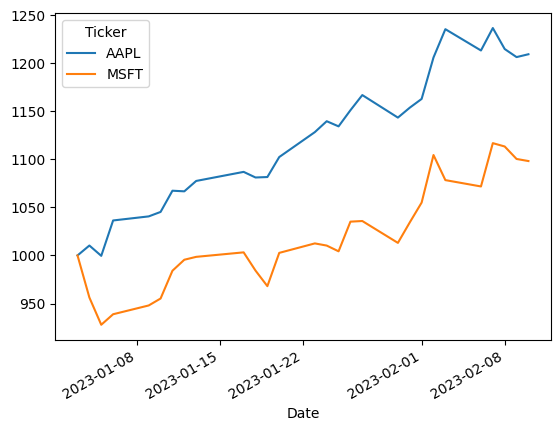

In [19]:
wealth_index_df.plot.line()

In [21]:
# constructing the cumulative maximum wealth
prior_peaks_df = wealth_index_df.cummax()
prior_peaks_df.head()

Ticker,AAPL,MSFT
Date,,
2023-01-03,1000.000000,1000.0
2023-01-04,1010.314251,1000.0
2023-01-05,1010.314251,1000.0
2023-01-06,1036.379613,1000.0
2023-01-09,1040.617256,1000.0


<Axes: xlabel='Date'>

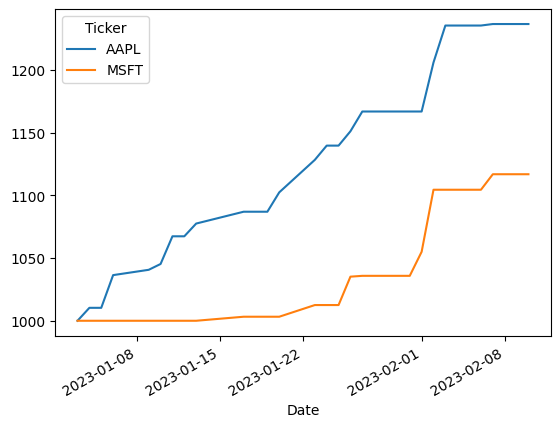

In [22]:
prior_peaks_df.plot.line()

<Axes: xlabel='Date'>

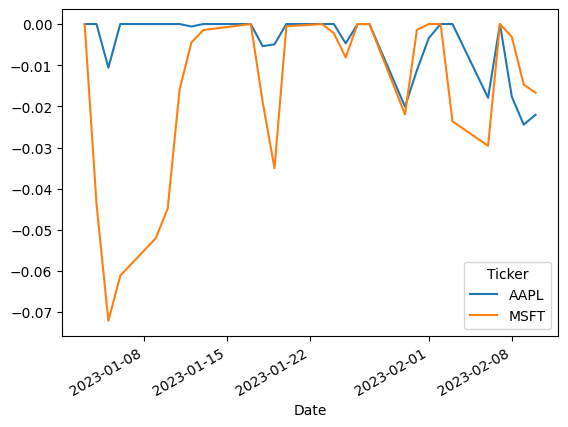

In [23]:
# calculating the daily drawdown
drawdown_df = (wealth_index_df - prior_peaks_df) / prior_peaks_df
drawdown_df.plot.line()

In [24]:
# calculating the maximum drawdown
drawdown_df.min()

Ticker
AAPL   -0.024442
MSFT   -0.072085
dtype: float64

In [25]:
# date when the maximum drawdown occurred
drawdown_df.idxmin()

Ticker
AAPL   2023-02-09
MSFT   2023-01-05
dtype: datetime64[ns]